<a href="https://colab.research.google.com/github/Collokd/Core-Week-8-IP/blob/master/Week_8_Independent_Project_Collins_Kemboi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning - IP Week 8

## 1. Defining the Question

### a) Specifying the Question

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. We have been tasked to create a model that wil determine whether or not the patient's symptoms indicate that the patient has hypothyroid.

### b) Defining the Metric for Success
1. Determining MAIN factors that will indicate whether a patient is positive for hypothyroid
2. Accuratly developing a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

### d) Recording the Experimental Design

1.   Data Cleaning and Preparation
2.   Perform EDA
3.   Split dataset into Training and Test Subset
4.   Making predictions and assessing accuracy of our models


### e) Data Relevance

The dataset for this project can be found from this [link](http://bit.ly/hypothyroid_data)

The data contains the below columns;

1. Age
2. Sex
3. on_thyroxine
4. query_on_thyroxine
5. on_antithyroid_medicationthyroid_surgery
6. query_hypothyroid
7. query_hyperthyroid
8. pregnant
9. sick
10. tumor
11. lithium
12. goitre
13. TSH_measured
14. TSH
15. T3_measured
16. T3
17. TT4_measured
18. TT4





## 2. Reading the Data

In [1]:
# Loading the Dataset and necessary libraries
# 
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import pandas.util.testing as tm
from sklearn import linear_model, datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn import metrics



from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

url = "hypothyroid.csv"

data = pd.read_csv(url)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import sys


## 3. Checking the Data

In [2]:
# Determining the no. of records in our dataset
#

data.shape

(3163, 26)

In [3]:
# Previewing our dataset
#
data

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?


In [4]:
# Previewing the first 10 rows

data.head(10)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
5,hypothyroid,85,F,f,f,f,f,t,f,f,f,f,f,f,y,138,y,1.10,y,27,y,1.19,y,23,n,?
6,hypothyroid,64,F,f,f,f,t,f,f,f,f,f,f,f,y,7.70,y,1.30,y,54,y,0.86,y,63,n,?
7,hypothyroid,72,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,1.90,y,34,y,1.05,y,32,n,?
8,hypothyroid,20,F,f,f,f,f,t,f,f,f,f,f,f,y,92,n,?,y,39,y,1.21,y,32,n,?
9,hypothyroid,42,F,f,f,f,f,f,f,f,f,f,f,f,y,48,n,?,y,7.60,y,1.02,y,7.50,n,?


In [5]:
# Previewing the bottom 10 rows

data.tail(10)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3153,negative,78,F,f,f,f,f,f,t,f,f,f,f,f,y,0,y,1.70,y,106,y,1.03,y,99,n,?
3154,negative,72,F,t,f,f,f,f,f,f,f,f,f,f,y,0.01,y,1.10,y,240,y,1.07,y,223,n,?
3155,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,2.40,y,123,y,0.99,y,124,n,?
3156,negative,40,F,f,f,f,f,f,f,f,t,f,f,f,y,2.10,y,1.20,y,76,y,0.90,y,84,n,?
3157,negative,69,F,f,f,f,f,f,f,f,f,f,f,f,y,2.60,y,1.80,y,126,y,1.02,y,124,n,?
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [6]:
# Checking whether each column has an appropriate datatype
#

data.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [8]:
data.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


## 4. External Data Source Validation

### a.Validation

## 5. Tidying the Dataset

In [9]:
# Previewing columns on our dataset
#
data.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [10]:
# Checking for duplicate values in the dataframe.
#
data.duplicated().values.any()

True

In [11]:
# Determinimg the total number of duplicates
data.duplicated().values.any().sum() 

1

In [0]:
# Dropping our duplicate rows
#
data.drop_duplicates(inplace=True)

In [13]:
# Confirming that we do not have duplicate values
#
data.duplicated().values.sum()

0

## 6. Checking and dealing with Outliers

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3086 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3086 non-null   object
 1   age                        3086 non-null   object
 2   sex                        3086 non-null   object
 3   on_thyroxine               3086 non-null   object
 4   query_on_thyroxine         3086 non-null   object
 5   on_antithyroid_medication  3086 non-null   object
 6   thyroid_surgery            3086 non-null   object
 7   query_hypothyroid          3086 non-null   object
 8   query_hyperthyroid         3086 non-null   object
 9   pregnant                   3086 non-null   object
 10  sick                       3086 non-null   object
 11  tumor                      3086 non-null   object
 12  lithium                    3086 non-null   object
 13  goitre                     3086 non-null   object
 14  TSH_meas

In [0]:
# From the above information we notice our dataset does not have the required data type. We will therefore convert the categorical
# coumns to integers using Lable Encoder.

In [16]:
# Checking our columns in our df

data.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [17]:
data.head(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [0]:
encode = LabelEncoder()

data['sex'] = encode.fit_transform(data['sex'])

data['on_thyroxine'] = encode.fit_transform(data['on_thyroxine'])

data['query_on_thyroxine'] = encode.fit_transform(data['query_on_thyroxine'])

data['on_antithyroid_medication'] = encode.fit_transform(data['on_antithyroid_medication'])

data['thyroid_surgery'] = encode.fit_transform(data['thyroid_surgery'])

data['query_hypothyroid'] = encode.fit_transform(data['query_hypothyroid'])

data['query_hyperthyroid'] = encode.fit_transform(data['query_hyperthyroid'])

data['pregnant'] = encode.fit_transform(data['pregnant'])

data['sick'] = encode.fit_transform(data['sick'])

data['tumor'] = encode.fit_transform(data['tumor'])

data['lithium'] = encode.fit_transform(data['lithium'])

data['goitre'] = encode.fit_transform(data['goitre'])

data['TSH_measured'] = encode.fit_transform(data['TSH_measured'])

data['T3_measured'] = encode.fit_transform(data['T3_measured'])

data['TT4_measured'] = encode.fit_transform(data['TT4_measured'])

data['T4U_measured'] = encode.fit_transform(data['T4U_measured'])

data['FTI_measured'] = encode.fit_transform(data['FTI_measured'])

data['TBG_measured'] = encode.fit_transform(data['TBG_measured'])





In [19]:
# Preview to see if the changes were implemented
data.head(10)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,2,0,0,0,0,0,0,0,0,0,0,0,1,30,1,0.60,1,15,1,1.48,1,10,0,?
1,hypothyroid,15,1,1,0,0,0,0,0,0,0,0,0,0,1,145,1,1.70,1,19,1,1.13,1,17,0,?
2,hypothyroid,24,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.20,1,4,1,1,1,0,0,?
3,hypothyroid,24,1,0,0,0,0,0,0,0,0,0,0,0,1,430,1,0.40,1,6,1,1.04,1,6,0,?
4,hypothyroid,77,2,0,0,0,0,0,0,0,0,0,0,0,1,7.30,1,1.20,1,57,1,1.28,1,44,0,?
5,hypothyroid,85,1,0,0,0,0,1,0,0,0,0,0,0,1,138,1,1.10,1,27,1,1.19,1,23,0,?
6,hypothyroid,64,1,0,0,0,1,0,0,0,0,0,0,0,1,7.70,1,1.30,1,54,1,0.86,1,63,0,?
7,hypothyroid,72,1,0,0,0,0,0,0,0,0,0,0,0,1,21,1,1.90,1,34,1,1.05,1,32,0,?
8,hypothyroid,20,1,0,0,0,0,1,0,0,0,0,0,0,1,92,0,?,1,39,1,1.21,1,32,0,?
9,hypothyroid,42,1,0,0,0,0,0,0,0,0,0,0,0,1,48,0,?,1,7.60,1,1.02,1,7.50,0,?


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3086 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3086 non-null   object
 1   age                        3086 non-null   object
 2   sex                        3086 non-null   int64 
 3   on_thyroxine               3086 non-null   int64 
 4   query_on_thyroxine         3086 non-null   int64 
 5   on_antithyroid_medication  3086 non-null   int64 
 6   thyroid_surgery            3086 non-null   int64 
 7   query_hypothyroid          3086 non-null   int64 
 8   query_hyperthyroid         3086 non-null   int64 
 9   pregnant                   3086 non-null   int64 
 10  sick                       3086 non-null   int64 
 11  tumor                      3086 non-null   int64 
 12  lithium                    3086 non-null   int64 
 13  goitre                     3086 non-null   int64 
 14  TSH_meas

In [21]:
objects = data[['status', 'age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']]

objects

,status,age,TSH,T3,TT4,T4U,FTI,TBG
0,hypothyroid,72,30,0.60,15,1.48,10,?
1,hypothyroid,15,145,1.70,19,1.13,17,?
2,hypothyroid,24,0,0.20,4,1,0,?
3,hypothyroid,24,430,0.40,6,1.04,6,?
4,hypothyroid,77,7.30,1.20,57,1.28,44,?
...,...,...,...,...,...,...,...,...
3158,negative,58,5.80,1.70,86,0.91,95,?
3159,negative,29,0.80,1.80,99,1.01,98,?
3160,negative,77,1.20,0.60,71,0.68,104,?
3161,negative,74,1.30,0.10,65,0.48,137,?


In [22]:
objects.nunique()

status      2
age        93
TSH       240
T3         70
TT4       269
T4U       159
FTI       281
TBG        53
dtype: int64

In [23]:
print(objects.status.unique())

print('STATUS****************************************************')

print(objects.age.unique())

print('AGE****************************************************')

print(objects.TSH.unique())

print('TSH****************************************************')

print(objects.T3.unique())

print('T3****************************************************')

print(objects.TT4.unique())

print('TT4****************************************************')

print(objects.T4U.unique())

print('T4U****************************************************')

print(objects.FTI.unique())

print('FTI****************************************************')

print(objects.TBG.unique())

print('TBG****************************************************')

['hypothyroid' 'negative']
STATUS****************************************************
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
AGE****************************************************
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35' '65' '57' '125' '23' '80' '117' '49' '66' '8.20'
 '150' '?' '18' '165' '164' '24' '90' '77' '19' '58' '100' '213' '17'
 '235' '153' '13' '31' '109' '260' '43' '12' '11' '55' '6.50' '20' '7.50'
 '14' '60' '140' '33' '8.70' '0.

In [0]:
#From above we observe the object data has ?, we need to replace them with zeroz before converting the object data types to int and floats respectively.

data["TBG"].replace({"?": 0}, inplace=True)

data["TT4"].replace({"?": 0}, inplace=True)

data["T4U"].replace({"?": 0}, inplace=True)

data["FTI"].replace({"?": 0}, inplace=True)

data["T3"].replace({"?": 0}, inplace=True)

data["TSH"].replace({"?": 0}, inplace=True)

In [25]:
# After replacementr results

print(data.status.unique())

print('STATUS****************************************************')

print(data.age.unique())

print('AGE****************************************************')

print(data.TSH.unique())

print('TSH****************************************************')

print(data.T3.unique())

print('T3****************************************************')

print(data.TT4.unique())

print('TT4****************************************************')

print(data.T4U.unique())

print('T4U****************************************************')

print(data.FTI.unique())

print('FTI****************************************************')

print(data.TBG.unique())

print('TBG****************************************************')

['hypothyroid' 'negative']
STATUS****************************************************
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
AGE****************************************************
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35' '65' '57' '125' '23' '80' '117' '49' '66' '8.20'
 '150' 0 '18' '165' '164' '24' '90' '77' '19' '58' '100' '213' '17' '235'
 '153' '13' '31' '109' '260' '43' '12' '11' '55' '6.50' '20' '7.50' '14'
 '60' '140' '33' '8.70' '0.25

In [26]:
objects.columns

Index(['status', 'age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG'], dtype='object')

In [27]:
objects.head(5)

,status,age,TSH,T3,TT4,T4U,FTI,TBG
0,hypothyroid,72,30,0.60,15,1.48,10,?
1,hypothyroid,15,145,1.70,19,1.13,17,?
2,hypothyroid,24,0,0.20,4,1,0,?
3,hypothyroid,24,430,0.40,6,1.04,6,?
4,hypothyroid,77,7.30,1.20,57,1.28,44,?


In [0]:
data["age"].replace({"?": 0}, inplace=True)

In [0]:
# # We now convert our objects to suitable data types

data['age'] = data['age'].astype(float)

data['TSH'] = data['TSH'].astype(float)

data['T3'] = data['T3'].astype(float)

data['TT4'] = data['TT4'].astype(float)

data['T4U'] = data['T4U'].astype(float)

data['FTI'] = data['FTI'].astype(float)

data['TBG'] = data['TBG'].astype(float)

In [0]:
data['age'] = data['age'].astype(int)

In [31]:
# We can now check for Outliers now that our data frame has the right dtypes

data.head(10)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,2,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0,0.0
1,hypothyroid,15,1,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0,0.0
2,hypothyroid,24,2,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0,0.0
3,hypothyroid,24,1,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0,0.0
4,hypothyroid,77,2,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0,0.0
5,hypothyroid,85,1,0,0,0,0,1,0,0,0,0,0,0,1,138.0,1,1.1,1,27.0,1,1.19,1,23.0,0,0.0
6,hypothyroid,64,1,0,0,0,1,0,0,0,0,0,0,0,1,7.7,1,1.3,1,54.0,1,0.86,1,63.0,0,0.0
7,hypothyroid,72,1,0,0,0,0,0,0,0,0,0,0,0,1,21.0,1,1.9,1,34.0,1,1.05,1,32.0,0,0.0
8,hypothyroid,20,1,0,0,0,0,1,0,0,0,0,0,0,1,92.0,0,0.0,1,39.0,1,1.21,1,32.0,0,0.0
9,hypothyroid,42,1,0,0,0,0,0,0,0,0,0,0,0,1,48.0,0,0.0,1,7.6,1,1.02,1,7.5,0,0.0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3086 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3086 non-null   object 
 1   age                        3086 non-null   int64  
 2   sex                        3086 non-null   int64  
 3   on_thyroxine               3086 non-null   int64  
 4   query_on_thyroxine         3086 non-null   int64  
 5   on_antithyroid_medication  3086 non-null   int64  
 6   thyroid_surgery            3086 non-null   int64  
 7   query_hypothyroid          3086 non-null   int64  
 8   query_hyperthyroid         3086 non-null   int64  
 9   pregnant                   3086 non-null   int64  
 10  sick                       3086 non-null   int64  
 11  tumor                      3086 non-null   int64  
 12  lithium                    3086 non-null   int64  
 13  goitre                     3086 non-null   int64

Outlier ranges
          0       1
0    27.00    0.00
1    64.00   98.00
2     0.00    0.00
3     1.70    4.20
4     0.50    0.00
5     2.20    4.70
6    77.00    6.60
7   124.00  194.00
8     0.82    0.48
9     1.05    1.39
10   85.00   24.00
11  126.00  187.00
12    0.00    0.00
13    0.00    0.00
Outlier ranges 
 [array([27., 27., 64., 64., 27.]), array([0. , 0. , 1.7, 1.7, 0. ]), array([0.5, 0.5, 2.2, 2.2, 0.5]), array([ 77.,  77., 124., 124.,  77.]), array([0.82, 0.82, 1.05, 1.05, 0.82]), array([ 85.,  85., 126., 126.,  85.]), array([0., 0., 0., 0., 0.])]


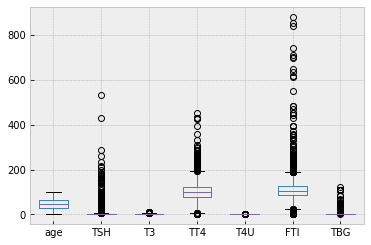

In [33]:
# OUTLIERS : Checking for Outliers by plotting a visual.
# ----
#
plt.style.use('bmh')

numerical_df = data[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']]
_t, df_outliers = pd.DataFrame.boxplot(numerical_df, return_type="both", widths=0.6)

outliers = [flier.get_ydata() for flier in df_outliers["fliers"]]
out_liers = [i.tolist() for i in outliers]
boxes = [box.get_ydata() for box in df_outliers["boxes"]]
whiskers = [whiskers.get_ydata() for whiskers in df_outliers["whiskers"]]

# Whiskers indicate the extensions from the top and bottom. 
# In our case it's in the range of 4 to 7
#
whiskers = pd.DataFrame(whiskers)

print("Outlier ranges\n", whiskers)


print("Outlier ranges \n", boxes)

In [0]:
# Function for counting number of outliers in our data columns and checking the percentage for each
# ----
#
def detect_outlier(data):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data)
    std_1 =np.std(data)
    
    for y in data:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [35]:
# Counting number of outliers in our data columns and cheking the percentage for each column using z-score
#
#
for col in numerical_df:
    rows, columns = numerical_df.shape
    percent_coefficient = float(100 / rows)
    outliers = detect_outlier(numerical_df[col])
    outliers_count = len(outliers)
    outliers_percentage = outliers_count * percent_coefficient
    print(f"{col} has {outliers_count} outliers in total, which is {outliers_percentage:.2}% of data")

age has 0 outliers in total, which is 0.0% of data
TSH has 46 outliers in total, which is 1.5% of data
T3 has 27 outliers in total, which is 0.87% of data
TT4 has 22 outliers in total, which is 0.71% of data
T4U has 8 outliers in total, which is 0.26% of data
FTI has 34 outliers in total, which is 1.1% of data
TBG has 73 outliers in total, which is 2.4% of data


In [36]:
# Droping ouliers from our dataframe using a z-test
#
from scipy import stats

z = np.abs(stats.zscore(numerical_df))
print(z)


[[1.11516012 1.12456291 0.76979099 ... 1.70267659 1.47512046 0.24937829]
 [1.14353798 6.28780272 0.16320405 ... 0.67191103 1.36820805 0.24937829]
 [0.78690144 0.22236921 1.10906191 ... 0.28905525 1.62785246 0.24937829]
 ...
 [1.31329153 0.16849193 0.76979099 ... 0.65335897 0.0394396  0.24937829]
 [1.19441268 0.16400215 1.19387964 ... 1.24236786 0.46457602 0.24937829]
 [0.4811396  0.22236921 0.24802178 ... 0.20070392 0.55621522 0.24937829]]


In [37]:
# Confirming that our outliers have been dropped from the dataset.
#
df_o = numerical_df[(z < 3).all(axis=1)]

print(f"Previous dataframe size : {numerical_df.shape[0]}")
print(f"New dataframe size: {df_o.shape[0]}")

Previous dataframe size : 3086
New dataframe size: 2897


In [38]:
# Checking for null values 
#
# ----
numerical_df.isnull().values.any()

False

In [0]:
# There are no missing values from our dataset

In [0]:
# Saving our Data without outliers
#
numerical_df.to_csv("Outliers_removed.csv")

## 6. Exploratory Analysis

> ## i) Univariate Analysis

In [40]:
# Loading our dataset and creating a dataframe.
# previewing our column names.
#
# ----
#
data.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3086 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3086 non-null   object 
 1   age                        3086 non-null   int64  
 2   sex                        3086 non-null   int64  
 3   on_thyroxine               3086 non-null   int64  
 4   query_on_thyroxine         3086 non-null   int64  
 5   on_antithyroid_medication  3086 non-null   int64  
 6   thyroid_surgery            3086 non-null   int64  
 7   query_hypothyroid          3086 non-null   int64  
 8   query_hyperthyroid         3086 non-null   int64  
 9   pregnant                   3086 non-null   int64  
 10  sick                       3086 non-null   int64  
 11  tumor                      3086 non-null   int64  
 12  lithium                    3086 non-null   int64  
 13  goitre                     3086 non-null   int64

In [42]:
data.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.00000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000
mean,43.858069,1.266040,0.144524,0.017822,0.013610,0.033377,0.076150,0.076150,0.019767,0.031432,0.012962,0.000648,0.031108,0.852560,4.952793,0.77965,1.507583,0.922229,100.252722,0.922553,0.901850,0.922878,106.582275,0.081335,2.527090
std,25.239866,0.492597,0.351677,0.132327,0.115883,0.179647,0.265282,0.265282,0.139220,0.174511,0.113128,0.025453,0.173638,0.354602,22.276447,0.41455,1.179190,0.267854,51.795700,0.267342,0.339608,0.266829,65.484772,0.273393,10.135203
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.00000,0.500000,1.000000,77.000000,1.000000,0.820000,1.000000,85.000000,0.000000,0.000000
50%,48.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.400000,1.00000,1.600000,1.000000,100.000000,1.000000,0.940000,1.000000,105.000000,0.000000,0.000000
75%,64.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.700000,1.00000,2.200000,1.000000,124.000000,1.000000,1.050000,1.000000,126.000000,0.000000,0.000000
max,98.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,530.000000,1.00000,10.200000,1.000000,450.000000,1.000000,2.210000,1.000000,881.000000,1.000000,122.000000


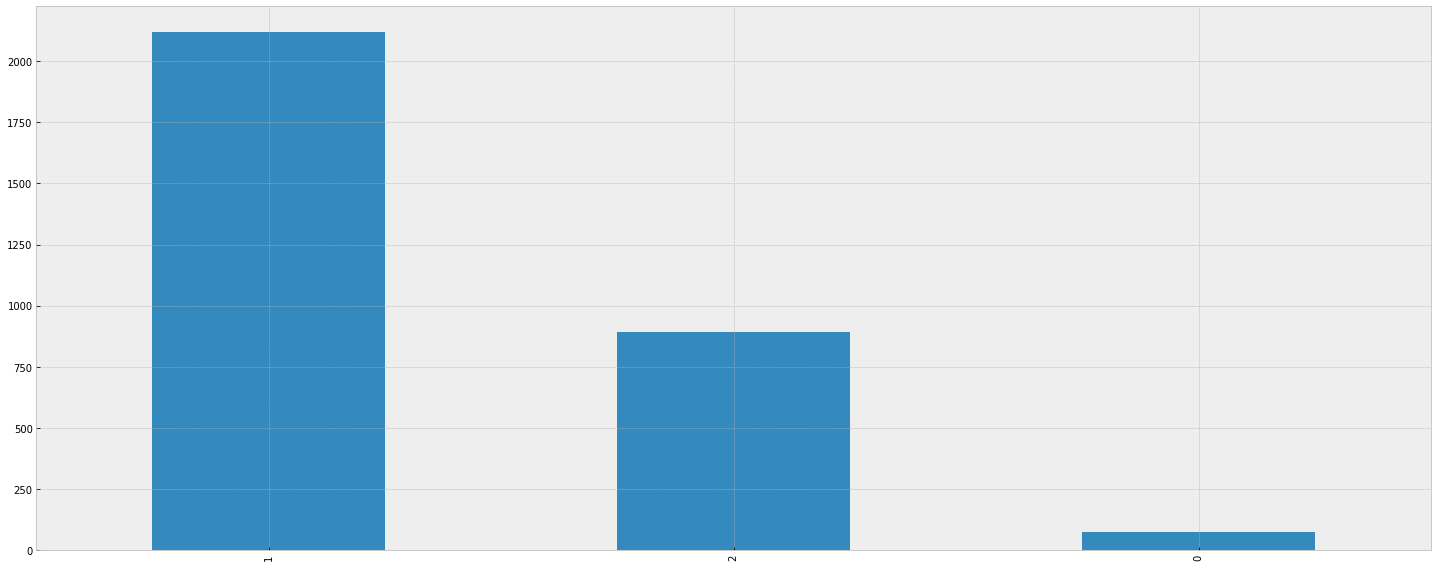

In [43]:
# Ploting the univariate summaries and recording our observations
#
plt.figure(figsize=(25,10))
data['sex'].value_counts().plot.bar()

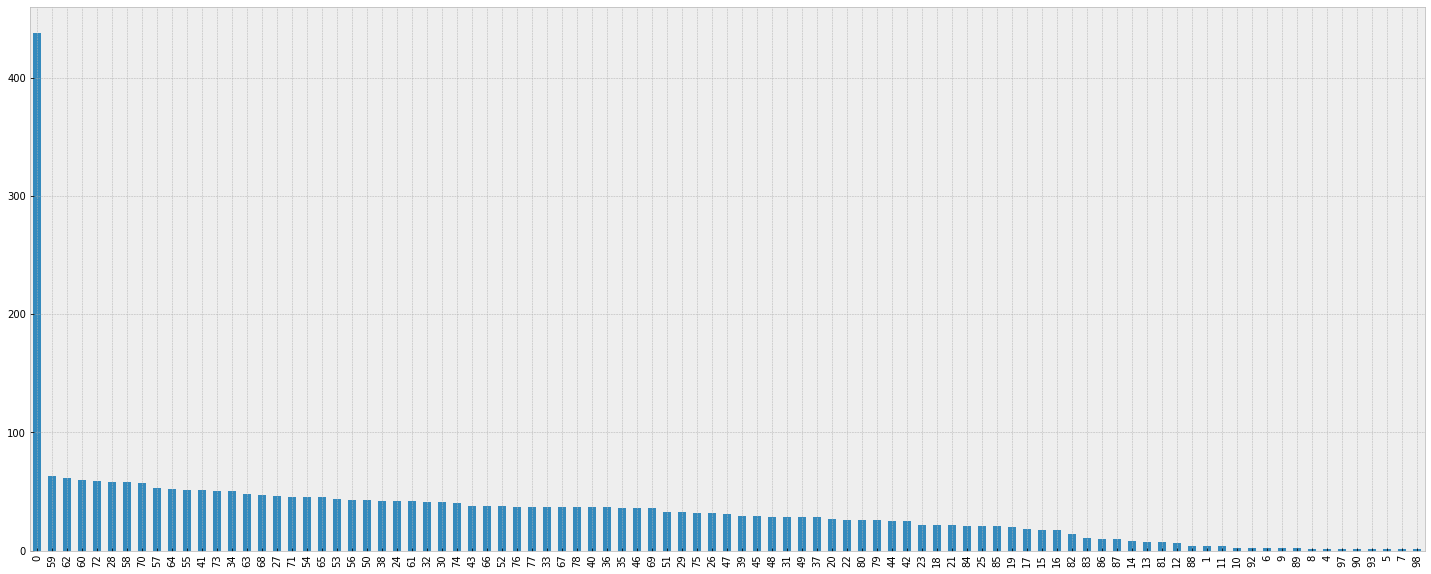

In [44]:
# Ploting the univariate summaries and recording our observations
#
plt.figure(figsize=(25,10))
data['age'].value_counts().plot.bar()

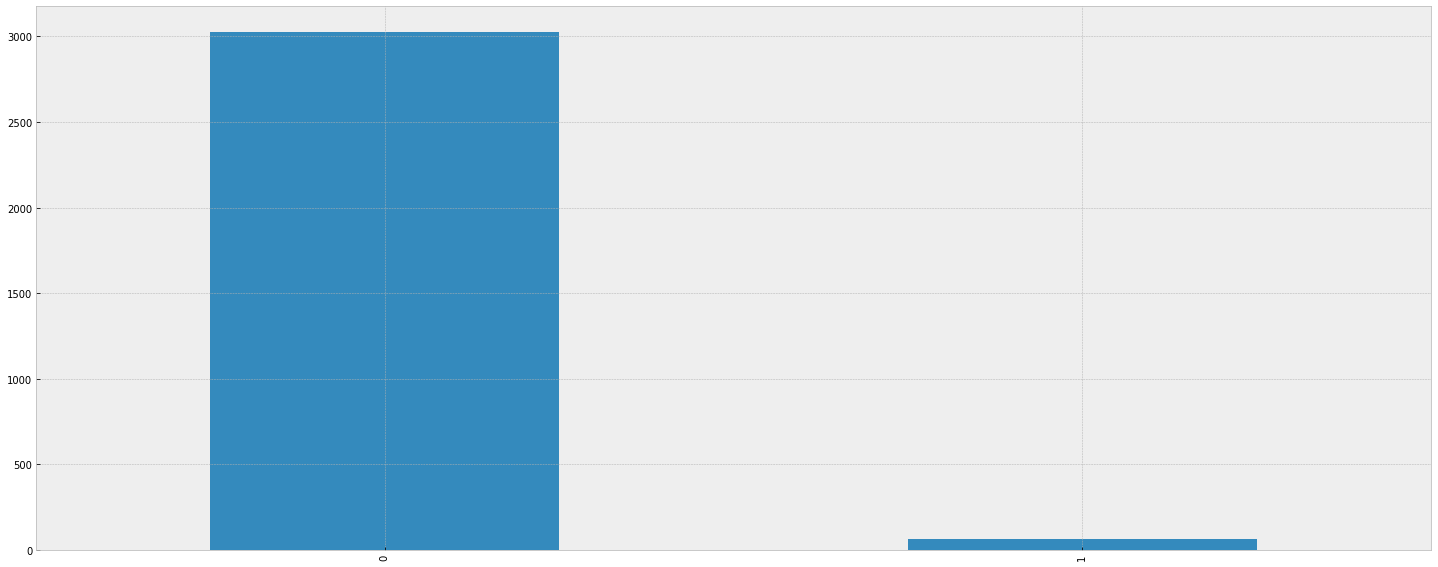

In [45]:
# Ploting the univariate summaries and recording our observations
#
plt.figure(figsize=(25,10))
data['pregnant'].value_counts().plot.bar()

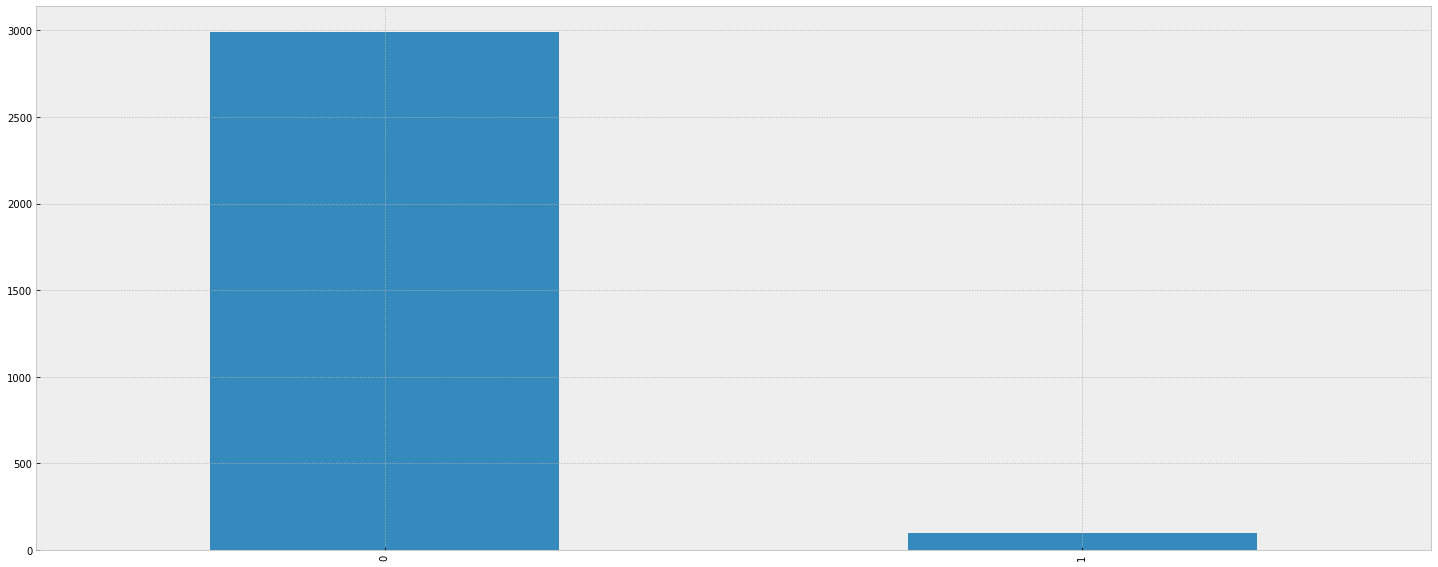

In [46]:
# Ploting the univariate summaries and recording our observations
#
plt.figure(figsize=(25,10))
data['sick'].value_counts().plot.bar()

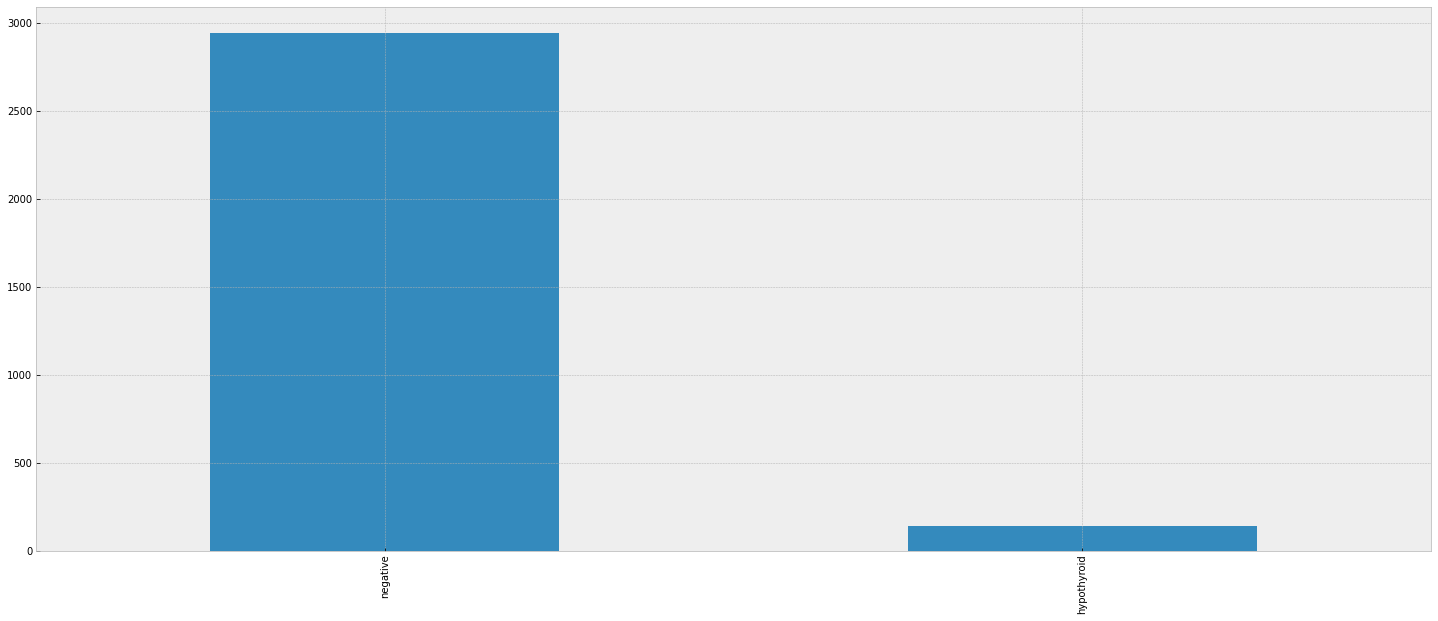

In [48]:
# Ploting the univariate summaries and recording our observations
#
plt.figure(figsize=(25,10))
data['status'].value_counts().plot.bar()

> ## ii) Bivariate Analysis


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3086 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3086 non-null   object 
 1   age                        3086 non-null   int64  
 2   sex                        3086 non-null   int64  
 3   on_thyroxine               3086 non-null   int64  
 4   query_on_thyroxine         3086 non-null   int64  
 5   on_antithyroid_medication  3086 non-null   int64  
 6   thyroid_surgery            3086 non-null   int64  
 7   query_hypothyroid          3086 non-null   int64  
 8   query_hyperthyroid         3086 non-null   int64  
 9   pregnant                   3086 non-null   int64  
 10  sick                       3086 non-null   int64  
 11  tumor                      3086 non-null   int64  
 12  lithium                    3086 non-null   int64  
 13  goitre                     3086 non-null   int64

Text(0.5, 1.0, 'Pairplot of Numeric variables.')

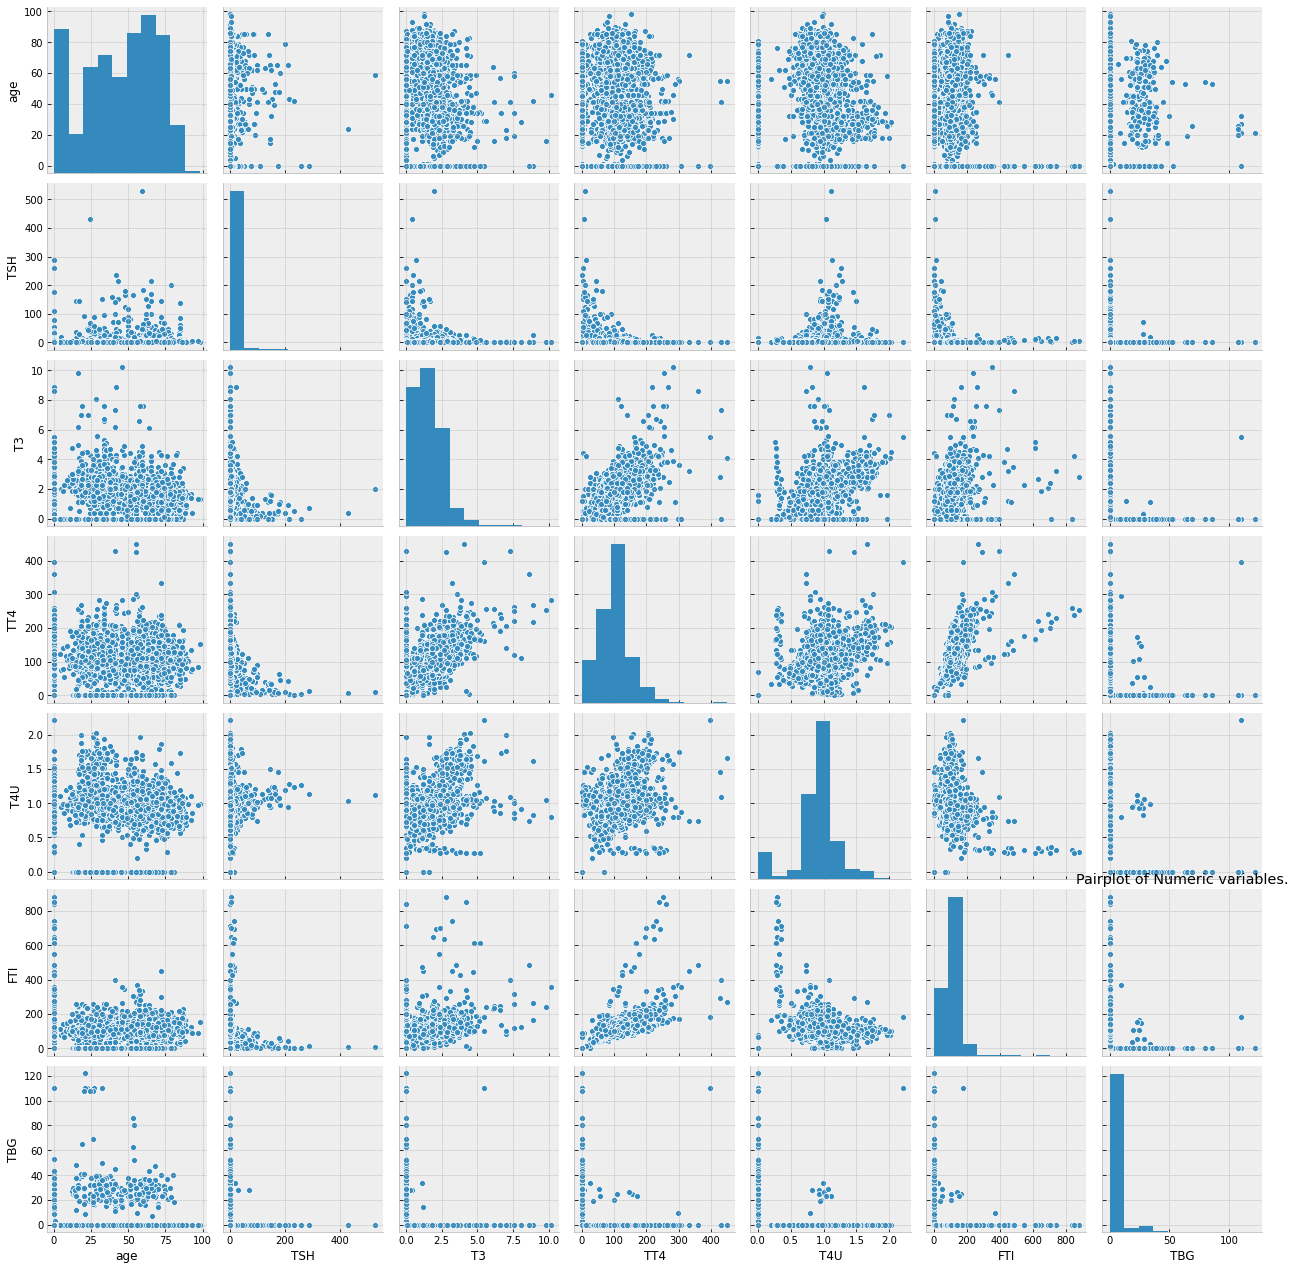

In [50]:
# drawing scatter plots on numeric variables to visualize any correlation
#
sns.pairplot(numerical_df)
plt.title("Pairplot of Numeric variables.")

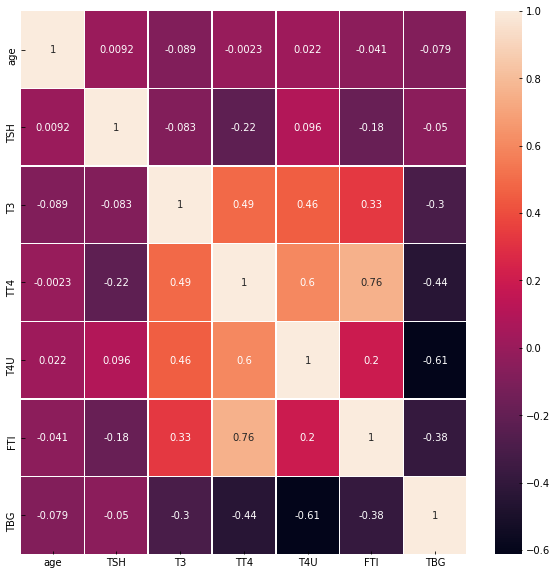

In [51]:
# Create a correlation matrix

corrMatrix = numerical_df.corr()
corrMatrix

# Vizualise the correlation matrix using a heat map

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corrMatrix, annot=True,  linewidths=.5, ax=ax)

> ## iii) Multivariate Analysis

**Linear Discriminant Analysis**

In [52]:
data.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [53]:
# Separating our response variable from the predictor variable
data1 = data.drop(['status'], 1)
label = data.drop(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'], 1)

data1

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,72,2,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0,0.0
1,15,1,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0,0.0
2,24,2,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0,0.0
3,24,1,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0,0.0
4,77,2,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,58,1,0,0,0,0,0,0,0,0,0,0,0,1,5.8,1,1.7,1,86.0,1,0.91,1,95.0,0,0.0
3159,29,1,0,0,0,0,0,0,0,0,0,0,0,1,0.8,1,1.8,1,99.0,1,1.01,1,98.0,0,0.0
3160,77,2,0,0,0,0,0,0,0,0,0,0,0,1,1.2,1,0.6,1,71.0,1,0.68,1,104.0,0,0.0
3161,74,1,0,0,0,0,0,0,0,0,0,0,0,1,1.3,1,0.1,1,65.0,1,0.48,1,137.0,0,0.0


In [54]:
label

,status
0,hypothyroid
1,hypothyroid
2,hypothyroid
3,hypothyroid
4,hypothyroid
...,...
3158,negative
3159,negative
3160,negative
3161,negative


In [0]:
encode = LabelEncoder()

label['status'] = encode.fit_transform(data['status'])

In [103]:
label

,status
0,0
1,0
2,0
3,0
4,0
...,...
3158,1
3159,1
3160,1
3161,1


In [56]:

# Subject our features to LDA model

# Import Linear Discriminant Analysis method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Create an instance of LDA
lda = LDA()

lda_= lda.fit(data1, label)
lda_data1 = lda_.transform(data1)

# Display the coeficients of the reducted columns
lda_.coef_

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-9.42620640e-03,  2.01568963e-01, -2.25177553e-01,
         7.28714699e-01,  1.01879493e+00, -1.23867762e+00,
        -1.97502781e-02, -8.51134504e-01,  9.99657804e-01,
         1.23820637e+00,  1.30209087e+00,  3.96933167e+00,
        -6.44482572e-01, -7.64623272e-01, -1.78198985e-01,
        -4.04153528e-01,  1.65541842e-01, -8.82670868e+00,
         7.26981745e-02,  1.07301416e+01, -8.13710281e+00,
        -7.11417147e+00, -1.81716049e-02, -6.79270562e+00,
        -9.00458600e-03]])

In [57]:
# Since the coefficients are in an array, we needto create a dataframe so that we can extract the name of the columns
f_imp = pd.DataFrame(index=data1.columns.values, data=lda_.coef_[0].T)
f_imp.sort_values(0, ascending=False)

,0
T4U_measured,10.730142
lithium,3.969332
tumor,1.302091
sick,1.238206
on_antithyroid_medication,1.018795
pregnant,0.999658
query_on_thyroxine,0.728715
sex,0.201569
T3,0.165542
TT4,0.072698


> # **Recommendation**

From our analysis we can comfortably conclude that we can use a linear combination of T4U_measured and Lithium to predict whether the patient is sick with hypothyroidism.

> # **Implementing the Solution**

> ## **Decision** **Trees**

## **Random Forest**

In [0]:
# Implementing the Solution for Random Forest
# 
# We define our test featres and target variable 

x = data.drop('status', axis = 1).values

In [0]:
# 0 = positive patients
y = label

In [61]:
y

,status
0,0
1,0
2,0
3,0
4,0
...,...
3158,1
3159,1
3160,1
3161,1


In [75]:
x.shape

(3086, 25)

In [63]:
y.shape

(3086, 1)

In [0]:
# Splitting our data into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(x,y, test_size = 0.2, random_state = 0)

In [76]:
# Model

rforest = RandomForestRegressor(n_estimators = 100, random_state=0, min_samples_split = 40, max_depth=5)
rforest = rforest.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [0]:
# Predict based on the model we've trained
y_pred = rforest.predict(X_test)




In [0]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison


In [79]:
# Evaluating the performance of our model as follows

# we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.014866730212480585
Mean Squared Error: 0.005474409767588042
Root Mean Squared Error: 0.07398925440621795


In [80]:
# We note our score is 100% meaning our model is perfectly accurate
rforest.score(X_train, y_train) 

0.8590072450606973

## **Ad Boosted Trees** **&** **Gradient** **Boosted** **Trees**

In [0]:
# Splitting our data into train and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [0]:
from sklearn.ensemble import AdaBoostRegressor

# from sklearn import DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

In [0]:
ada_boost = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 5), n_estimators = 300, random_state = 0)

In [92]:
# Training our data by fitting our model

ada_boost = ada_boost.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [95]:
# Predict based on the model we've trained

y_predict_ada_boost = ada_boost.predict(x_test)

y_predict_ada_boost

array([1.        , 0.95421687, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.24517906, 1.        , 1.        , 1.        , 0.25446429,
       0.9787234 , 1.        , 1.        , 1.        , 0.81914894,
       1.        , 1.        , 0.60851648, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.94520548, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.85815603, 1.        , 0.97701149, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [0]:
# Comparing Actual vs Predicted

comparison_df2 = pd.DataFrame({"Actual" : y_test, "Predicted" : y_predict_ada_boost})

comparison_df2.head(5)

In [98]:
# Performance evaluation shows our model is very accurate with no errors

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict_ada_boost))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict_ada_boost))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict_ada_boost)))

Mean Absolute Error: 0.024919494561741893
Mean Squared Error: 0.00966759764059756
Root Mean Squared Error: 0.09832394235687236


In [0]:
# Let's visualize what the data looks like
# Plot the results
plt.figure()
plt.scatter(x, y, c="k", label="training samples")
plt.plot(x, y_pred_tree, c="r", label="single tree")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Basic data")
plt.legend()
plt.show()


In [0]:
# Let's now transition to gradient boosting

from sklearn.ensemble import GradientBoostingRegressor

In [0]:
# Splitting our data into train and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [102]:
target_number_of_trees = 200

gbr = GradientBoostingRegressor(n_estimators=target_number_of_trees, learning_rate=0.1, max_depth=2)

# Fitting our train data to the model
gbr = gbr.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [103]:
# MAking prediction with our model

y_pred_gbr = gbr.predict(x)

print(y_pred_gbr)


[-0.05310974  0.0766659   0.66714942 ...  1.00069875  1.00288762
  1.00509547]


In [0]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_gbr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_gbr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr)))

In [105]:
gbr.score(x_train, y_train)

0.8969313362522255

> # **Support Vector Machines**

## Linear Regression

In [0]:
#  Split the data into train and test set,for every 10 observations 8 will go training the model and 2 testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
#importing library and setting kernel to linear
from sklearn.svm import SVC,LinearSVC
svm_model = SVC(kernel = 'linear', random_state=0)

In [109]:
# fitting our train dataset
svm_model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [110]:
#predicting with the test set
y_pred = svm_model.predict(x_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [0]:
#checking the accuracy of our model
from sklearn.metrics import accuracy_score, confusion_matrix

In [114]:
#Testing the accuracy of model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9870550161812298

In [115]:
# Performance Evaluation using Confusion matrix

con_mat = confusion_matrix(y_test, y_pred)

con_mat

array([[ 19,   6],
       [  2, 591]])

> ## Polynomial Regression

In [0]:
#  Split the data into train and test set,for every 10 observations 8 will go training the model and 2 testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
#Setting the kernel to polynomial

polyclassifier = SVC(kernel = 'poly', degree = 2, gamma='auto')

In [118]:
# Fitting the model to the training set

polyclassifier.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
# Prediction based on the independent test

y_pred = polyclassifier.predict(x_test)

In [120]:
#Testing the accuracy of model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.982200647249191

In [121]:
# Performance Evaluation using Confusion matrix

con_mat2 = confusion_matrix(y_test, y_pred)

con_mat2

array([[ 19,   6],
       [  5, 588]])

## Radial Basis Function

In [0]:
# Setting the kernel to RBF

rbf = SVC(kernel = 'rbf')

In [123]:
# fitting the training dataset
rbf.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [124]:
# checking predicted values
y_pred = rbf.predict(x_test)

print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [125]:
#Testing the accuracy of model
accuracy3 = accuracy_score(y_test, y_pred)
accuracy3

0.9838187702265372